# Query session database

When you interact with protein-detective a session database is created to store the results of your queries. This notebook shows how to query that database.

This notebooks expects that you have run the [workflow.ipynb](workflow.ipynb) notebook first to create and fill the session database.

In [1]:
from pathlib import Path

from protein_detective.db import connect

Configure [%sql magic](https://jupysql.ploomber.io/en/latest/quick-start.html#querying) to use the session database.

In [2]:
session_dir = Path("session1")
# connect() is a context manager, to use connection over multiple cells, we cal its enter method directly.
conn = connect(session_dir, read_only=True).__enter__()

%load_ext sql
%sql conn
# %sql does not retain variable set in initialize_db(), so we use Python API for queries that need it.

Loading configurations from /home/verhoes/git/protein-detective/protein-detective/pyproject.toml.

Settings changed:

Config,value
displaylimit,100


In [3]:
# Paths in the database are relative to the session directory.
# To make full paths, you need to prepend the session directory.
# The session directory is set as a variable in the database.

conn.execute("SELECT getvariable('session_dir')").fetchone()

('session1',)

## Uniprot search results

In [4]:
%sql SELECT * FROM proteins

Running query in 'DuckDBPyConnection'

uniprot_acc
B1APH4
A6NE82
A8MYZ6
A0A1W2PPK0
A8MUV8
A8K0S8
A6NFI3
A8K8V0
A8MT69
A6NJT0


In [5]:
%sql SELECT * FROM pdbs

Running query in 'DuckDBPyConnection'

pdb_id,method,resolution,mmcif_file
7YWX,Electron_Microscopy,12.0,downloads/7ywx.cif
4NE5,X-Ray_Crystallography,2.5,downloads/4ne5.cif
4E45,X-Ray_Crystallography,2.0,downloads/4e45.cif
4NDY,X-Ray_Crystallography,7.0,downloads/4ndy.cif
4NE3,X-Ray_Crystallography,1.7999999523162842,downloads/4ne3.cif
4E44,X-Ray_Crystallography,2.0999999046325684,downloads/4e44.cif
4NE6,X-Ray_Crystallography,2.0999999046325684,downloads/4ne6.cif
7R5S,Electron_Microscopy,2.8299999237060547,downloads/7r5s.cif
7XHN,Electron_Microscopy,3.7100000381469727,downloads/7xhn.cif
7XHO,Electron_Microscopy,3.2899999618530273,downloads/7xho.cif


In [6]:
%sql SELECT * FROM proteins_pdbs

Running query in 'DuckDBPyConnection'

uniprot_acc,pdb_id,uniprot_chains,single_chain_pdb_file
A8MT69,7YWX,X=1-81,single_chain/A8MT69_7ywx_X2A.pdb
A8MT69,4NE5,B/D/F/H=8-81,single_chain/A8MT69_4ne5_B2A.pdb
A8MT69,4E45,B/D/G/I/L/N=1-81,single_chain/A8MT69_4e45_B2A.pdb
A8MT69,4NDY,B/D/H/L/M/N/U/V/W/X=8-81,single_chain/A8MT69_4ndy_B2A.pdb
A8MT69,4NE3,B=8-81,single_chain/A8MT69_4ne3_B2A.pdb
A8MT69,4E44,B/D=1-81,single_chain/A8MT69_4e44_B2A.pdb
A8MT69,4NE6,B/D=8-81,single_chain/A8MT69_4ne6_B2A.pdb
A8MT69,7R5S,X=1-81,single_chain/A8MT69_7r5s_X2A.pdb
A8MT69,7XHN,X=1-81,single_chain/A8MT69_7xhn_X2A.pdb
A8MT69,7XHO,X=1-81,single_chain/A8MT69_7xho_X2A.pdb


In [7]:
%sql SELECT * FROM alphafolds LIMIT 1

Running query in 'DuckDBPyConnection'

uniprot_acc,summary,bcif_file,cif_file,pdb_file,pae_image_file,pae_doc_file,am_annotations_file,am_annotations_hg19_file,am_annotations_hg38_file
A0A087WUV0,"{""entryId"": ""AF-A0A087WUV0-F1"", ""gene"": ""Unknown"", ""sequenceChecksum"": ""5DE83E4BE25B68BD"", ""sequenceVersionDate"": ""2014-10-29"", ""uniprotAccession"": ""A0A087WUV0"", ""uniprotId"": ""A0A087WUV0_HUMAN"", ""uniprotDescription"": ""Uncharacterized protein"", ""taxId"": 9606, ""organismScientificName"": ""Homo sapiens"", ""uniprotStart"": 1, ""uniprotEnd"": 522, ""uniprotSequence"": ""MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEALTQWRQLNSPQGDVPEKPRNLVLLGLPISTPDVISQLEHEEELEREVSKAASQKHWETIPESKELTPEKDISEEESAPGVLIVRFSKESSSECEDSLESQQENHEKHLIQEAVTEKSSRERSYQSDEFRRNCTQRSLLVQQQGERLHHCDSFKNNLKQNSDIIRHERICAGKKPWKCNECEKAFSYYSAFVLHQRIHTGEKPYECNECGKAFSQSIHLTLHQRIHTGEKPYECHECGKAFSHRSALIRHHIIHTGEKPYECNECGKAFNQSSYLTQHQRIHTGEKPYECNECGKAFSQSTFLTQHQVIHTGEKPYKCNECGKAFSDRSGLIQHQRTHTGERPYECNECGKAFGYCSALTQHQRTHTGEKPYKCNDCAKAFSDRSALIRHQRTHTGEKPYKCKDCGKAFSQSSSLTKHQKTHTGEKPYKCKECGKAFSQSSSLSQHQKTHAGVKTKKYVQALSEHLTFGQHKRIHTG"", ""modelCreatedDate"": ""2022-06-01"", ""latestVersion"": 4, ""allVersions"": [1, 2, 3, 4], ""bcifUrl"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-model_v4.bcif"", ""cifUrl"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-model_v4.cif"", ""pdbUrl"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-model_v4.pdb"", ""paeImageUrl"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-predicted_aligned_error_v4.png"", ""paeDocUrl"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-predicted_aligned_error_v4.json"", ""amAnnotationsUrl"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-aa-substitutions.csv"", ""amAnnotationsHg19Url"": null, ""amAnnotationsHg38Url"": ""https://alphafold.ebi.ac.uk/files/AF-A0A087WUV0-F1-hg38.csv"", ""isReviewed"": false, ""isReferenceProteome"": true}",None,None,downloads/AF-A0A087WUV0-F1-model_v4.pdb,None,None,None,None,None


In [8]:
%sql SELECT count(*) FROM alphafolds

Running query in 'DuckDBPyConnection'

count_star()
71


In [9]:
# Fetch fields from inside summary
%sql SELECT uniprot_acc, summary.taxId, summary.uniprotStart, summary.uniprotEnd, summary.gene FROM alphafolds

Running query in 'DuckDBPyConnection'

uniprot_acc,taxId,uniprotStart,uniprotEnd,gene
A0A087WUV0,9606,1,522,"""Unknown"""
A0A0C5B5G6,9606,1,16,"""MT-RNR1"""
A0A0U1RQI7,9606,1,1052,"""KLF18"""
A0A1B0GTS1,9606,1,333,"""HSFX4"""
A0A1B0GVZ6,9606,1,204,"""MBD3L2B"""
A0A1B0GWH4,9606,1,333,"""HSFX3"""
A0A1W2PPF3,9606,1,345,"""DUXB"""
A0A1W2PPK0,9606,1,400,"""Unknown"""
A0A1W2PPM1,9606,1,405,"""CPHXL"""
A0A1W2PQ73,9606,1,354,"""ERFL"""


## Density filtered models

In [10]:
%%sql
SELECT 
f.confidence, f.min_threshold, f.max_threshold,
density_filtered_alphafolds.*, 
alphafolds.summary.uniprotStart, 
alphafolds.summary.uniprotEnd, 
length(alphafolds.summary.uniprotSequence) AS uniprot_length
FROM density_filtered_alphafolds
JOIN density_filters  AS f USING (density_filter_id) 
JOIN alphafolds USING (uniprot_acc)
LIMIT 100;

Running query in 'DuckDBPyConnection'

confidence,min_threshold,max_threshold,density_filter_id,uniprot_acc,nr_residues_above_confidence,keep,pdb_file,uniprotStart,uniprotEnd,uniprot_length
70.0,100,500,1,A0A087WUV0,283,True,density_filtered/AF-A0A087WUV0-F1-model_v4.pdb,1,522,524
70.0,100,500,1,A0A0C5B5G6,10,False,None,1,16,18
70.0,100,500,1,A0A0U1RQI7,192,True,density_filtered/AF-A0A0U1RQI7-F1-model_v4.pdb,1,1052,1054
70.0,100,500,1,A0A1B0GTS1,116,True,density_filtered/AF-A0A1B0GTS1-F1-model_v4.pdb,1,333,335
70.0,100,500,1,A0A1B0GVZ6,54,False,None,1,204,206
70.0,100,500,1,A0A1B0GWH4,117,True,density_filtered/AF-A0A1B0GWH4-F1-model_v4.pdb,1,333,335
70.0,100,500,1,A0A1W2PPF3,124,True,density_filtered/AF-A0A1W2PPF3-F1-model_v4.pdb,1,345,347
70.0,100,500,1,A0A1W2PPK0,71,False,None,1,400,402
70.0,100,500,1,A0A1W2PPM1,68,False,None,1,405,407
70.0,100,500,1,A0A1W2PQ73,86,False,None,1,354,356


## Powerfit

In [11]:
result = %sql SELECT powerfit_run_id, options.target, options.resolution FROM powerfit_runs;

Running query in 'DuckDBPyConnection'

In [12]:
result

powerfit_run_id,target,resolution
1,"""../../powerfit-tutorial/ribosome-KsgA.map""",13


In [13]:
%%sql 
SELECT density_filter_id, uniprot_acc, pdb_file, 
parse_filename(pdb_file, true) AS pdb_filename 
FROM density_filtered_alphafolds WHERE keep=True

Running query in 'DuckDBPyConnection'

density_filter_id,uniprot_acc,pdb_file,pdb_filename
1,A0A087WUV0,density_filtered/AF-A0A087WUV0-F1-model_v4.pdb,AF-A0A087WUV0-F1-model_v4
1,A0A0U1RQI7,density_filtered/AF-A0A0U1RQI7-F1-model_v4.pdb,AF-A0A0U1RQI7-F1-model_v4
1,A0A1B0GTS1,density_filtered/AF-A0A1B0GTS1-F1-model_v4.pdb,AF-A0A1B0GTS1-F1-model_v4
1,A0A1B0GWH4,density_filtered/AF-A0A1B0GWH4-F1-model_v4.pdb,AF-A0A1B0GWH4-F1-model_v4
1,A0A1W2PPF3,density_filtered/AF-A0A1W2PPF3-F1-model_v4.pdb,AF-A0A1W2PPF3-F1-model_v4
1,A0A1W2PQL4,density_filtered/AF-A0A1W2PQL4-F1-model_v4.pdb,AF-A0A1W2PQL4-F1-model_v4
1,A1YPR0,density_filtered/AF-A1YPR0-F1-model_v4.pdb,AF-A1YPR0-F1-model_v4
1,A2RRD8,density_filtered/AF-A2RRD8-F1-model_v4.pdb,AF-A2RRD8-F1-model_v4
1,A6NDX5,density_filtered/AF-A6NDX5-F1-model_v4.pdb,AF-A6NDX5-F1-model_v4
1,A6NFD8,density_filtered/AF-A6NFD8-F1-model_v4.pdb,AF-A6NFD8-F1-model_v4


In [14]:
%%sql
SELECT uniprot_acc, pdb_id, single_chain_pdb_file, 
parse_filename(single_chain_pdb_file, true) AS structure
    FROM proteins_pdbs
    WHERE single_chain_pdb_file IS NOT NULL 

Running query in 'DuckDBPyConnection'

uniprot_acc,pdb_id,single_chain_pdb_file,structure
A8MT69,7YWX,single_chain/A8MT69_7ywx_X2A.pdb,A8MT69_7ywx_X2A
A8MT69,4NE5,single_chain/A8MT69_4ne5_B2A.pdb,A8MT69_4ne5_B2A
A8MT69,4E45,single_chain/A8MT69_4e45_B2A.pdb,A8MT69_4e45_B2A
A8MT69,4NDY,single_chain/A8MT69_4ndy_B2A.pdb,A8MT69_4ndy_B2A
A8MT69,4NE3,single_chain/A8MT69_4ne3_B2A.pdb,A8MT69_4ne3_B2A
A8MT69,4E44,single_chain/A8MT69_4e44_B2A.pdb,A8MT69_4e44_B2A
A8MT69,4NE6,single_chain/A8MT69_4ne6_B2A.pdb,A8MT69_4ne6_B2A
A8MT69,7R5S,single_chain/A8MT69_7r5s_X2A.pdb,A8MT69_7r5s_X2A
A8MT69,7XHN,single_chain/A8MT69_7xhn_X2A.pdb,A8MT69_7xhn_X2A
A8MT69,7XHO,single_chain/A8MT69_7xho_X2A.pdb,A8MT69_7xho_X2A


In [15]:
from protein_detective.db import powerfit_solutions

In [16]:
df = powerfit_solutions(conn)
df

,powerfit_run_id,structure,rank,cc,fishz,relz,translation,rotation,density_filter_id,af_id,pdb_id,pdb_file,uniprot_acc
0,1,A8MT69_4ne6_B2A,1,0.456,0.492,11.071,"[227.18, 242.53, 211.83]","[0.0, -0.0, -1.0, 0.604, -0.797, 0.0, -0.797, ...",<NA>,None,4NE6,session1/single_chain/A8MT69_4ne6_B2A.pdb,A8MT69
1,1,A8MT69_4drb_J2A,1,0.444,0.477,10.588,"[227.18, 242.53, 214.9]","[0.797, -0.604, 0.0, 0.604, 0.797, 0.0, 0.0, 0...",<NA>,None,4DRB,session1/single_chain/A8MT69_4drb_J2A.pdb,A8MT69
2,1,A8MT69_4dra_E2A,1,0.443,0.476,10.402,"[214.9, 187.27, 214.9]","[1.0, -0.0, 0.0, 0.0, -0.0, 1.0, -0.0, -1.0, -...",<NA>,None,4DRA,session1/single_chain/A8MT69_4dra_E2A.pdb,A8MT69
3,1,A8MT69_4e44_B2A,1,0.440,0.472,10.099,"[224.11, 236.39, 227.18]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]",<NA>,None,4E44,session1/single_chain/A8MT69_4e44_B2A.pdb,A8MT69
4,1,A8MT69_7xhn_X2A,1,0.439,0.471,10.136,"[230.25, 242.53, 217.97]","[-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0]",<NA>,None,7XHN,session1/single_chain/A8MT69_7xhn_X2A.pdb,A8MT69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62752,1,AF-A8MTY0-F1-model_v4,1463,0.095,0.095,5.424,"[168.85, 202.62, 236.39]","[0.0, 1.0, 0.0, 0.797, 0.0, -0.604, -0.604, 0....",1,A8MTY0,None,session1/density_filtered/AF-A8MTY0-F1-model_v...,A8MTY0
62753,1,AF-A8MTY0-F1-model_v4,1462,0.095,0.095,5.425,"[122.8, 174.99, 147.36]","[0.797, 0.604, 0.0, 0.604, -0.797, 0.0, 0.0, 0...",1,A8MTY0,None,session1/density_filtered/AF-A8MTY0-F1-model_v...,A8MTY0
62754,1,AF-A8MTY0-F1-model_v4,1461,0.095,0.095,5.429,"[150.43, 211.83, 104.38]","[0.548, 0.548, 0.632, 0.184, -0.816, 0.548, 0....",1,A8MTY0,None,session1/density_filtered/AF-A8MTY0-F1-model_v...,A8MTY0
62755,1,AF-A8MTY0-F1-model_v4,1460,0.095,0.096,5.437,"[224.11, 282.44, 150.43]","[0.0, 0.797, 0.604, -1.0, 0.0, -0.0, 0.0, -0.6...",1,A8MTY0,None,session1/density_filtered/AF-A8MTY0-F1-model_v...,A8MTY0


<Axes: title={'center': 'Histogram of CC Values'}, ylabel='Frequency'>

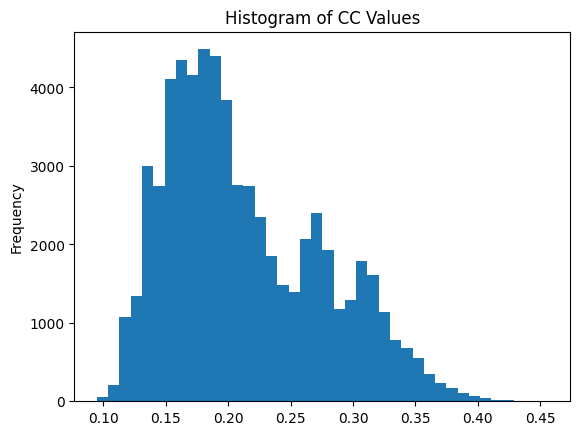

In [17]:
df["cc"].plot(kind="hist", title="Histogram of CC Values", bins=40)

Show the top fitted models and their scores.

In [ ]:
conn.execute("""
    SELECT
        f.* EXCLUDE (unfitted_model_file),
        s.* EXCLUDE (pdb_file),
        coalesce(f.unfitted_model_file, s.pdb_file) AS unfitted_model_file,
    FROM fitted_models AS f
    JOIN solutions AS s USING (powerfit_run_id, structure, rank)""").df()

,powerfit_run_id,structure,rank,fitted_model_file,powerfit_run_id_1,structure_1,rank_1,cc,fishz,relz,translation,rotation,density_filter_id,af_id,pdb_id,uniprot_acc,unfitted_model_file
0,1,A8MT69_4ne6_B2A,1,session1/powerfit/1/A8MT69_4ne6_B2A/fit_1.pdb,1,A8MT69_4ne6_B2A,1,0.456,0.492,11.071,"[227.18, 242.53, 211.83]","[0.0, -0.0, -1.0, 0.604, -0.797, 0.0, -0.797, ...",<NA>,None,4NE6,A8MT69,session1/single_chain/A8MT69_4ne6_B2A.pdb
1,1,A8MT69_4ne6_B2A,2,session1/powerfit/1/A8MT69_4ne6_B2A/fit_2.pdb,1,A8MT69_4ne6_B2A,2,0.438,0.470,10.571,"[138.15, 153.5, 138.15]","[-0.797, 0.604, 0.0, 0.604, 0.797, 0.0, 0.0, 0...",<NA>,None,4NE6,A8MT69,session1/single_chain/A8MT69_4ne6_B2A.pdb
2,1,A8MT69_4ne6_B2A,3,session1/powerfit/1/A8MT69_4ne6_B2A/fit_3.pdb,1,A8MT69_4ne6_B2A,3,0.428,0.457,10.297,"[227.18, 138.15, 227.18]","[-0.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, -0.0]",<NA>,None,4NE6,A8MT69,session1/single_chain/A8MT69_4ne6_B2A.pdb
3,1,A8MT69_4ne6_B2A,4,session1/powerfit/1/A8MT69_4ne6_B2A/fit_4.pdb,1,A8MT69_4ne6_B2A,4,0.407,0.432,9.720,"[276.3, 248.67, 153.5]","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",<NA>,None,4NE6,A8MT69,session1/single_chain/A8MT69_4ne6_B2A.pdb
4,1,A8MT69_4ne6_B2A,5,session1/powerfit/1/A8MT69_4ne6_B2A/fit_5.pdb,1,A8MT69_4ne6_B2A,5,0.399,0.422,9.498,"[184.2, 190.34, 205.69]","[0.816, 0.548, 0.184, -0.184, 0.548, -0.816, -...",<NA>,None,4NE6,A8MT69,session1/single_chain/A8MT69_4ne6_B2A.pdb
